# Probability theory intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import comp_prob_inference

## Probability spaces

Finite case: A *probability space* (a.k.a. probability model) is a pair $(\Omega, P)$, where $\Omega$ is a sample space and a $P$ a probability function that assigns values in $[0,1]$ to each $\omega \in \Omega$. In Python, probability spaces can be conveniently represented as dictionaries. A probability table says it all in the finite case.

## Probability tables

In [2]:
#3 probability tables:
coin = {'heads': 1/2, 'tails': 1/2}
die = {'1': 1/6, '2': 1/6, '3': 1/6, '4': 1/6, '5': 1/6, '6': 1/6}
weather = {'sunny': 1/2, 'rainy': 1/6, 'snowy': 1/3}

In [3]:
#Looking at the tables 
weather

{'sunny': 0.5, 'rainy': 0.16666666666666666, 'snowy': 0.3333333333333333}

In [4]:
# Finding a probability
weather['sunny']

0.5

## Joint probability distributions

In [5]:
#Works for cartesian sample spaces too:
weather_combination = {
('sunny','hot'): 3/10,
('sunny','cold'): 1/5,
('rainy','hot'): 1/30,
('rainy','cold'): 2/15,
('snowy','hot'): 0,
('snowy','cold'): 1/3
}

In [6]:
weather_combination[('sunny','hot')]

0.3

## Sampling from finite probability spaces

In [7]:
list(weather_combination.values())

[0.3, 0.2, 0.03333333333333333, 0.13333333333333333, 0, 0.3333333333333333]

In [8]:
keys=list(weather_combination.keys())
keys

[('sunny', 'hot'),
 ('sunny', 'cold'),
 ('rainy', 'hot'),
 ('rainy', 'cold'),
 ('snowy', 'hot'),
 ('snowy', 'cold')]

In [9]:
nkeys=list(range(len(keys)))
nkeys

[0, 1, 2, 3, 4, 5]

In [10]:
def sample_from(finite_prob_space):
    """
    Produces a random outcome from a given finite probability space.
    
    Input
    -----
    - finite_prob_space: finite probability space encoded as a
      dictionary

    Output
    ------
    - random outcome, which is one of finite_probability_space's keys
    """
    keys=list(finite_prob_space.keys())
    nkeys=list(range(len(keys)))
    random_outcome = np.random.choice(nkeys,p=list(finite_prob_space.values()))
    return keys[random_outcome]

In [23]:
#A coin flipper
sample_from(coin)

'heads'

In [26]:
# A die roller
sample_from(die)

'3'

In [27]:
sample_from(weather)

'sunny'

In [28]:
sample_from(weather_combination)

('rainy', 'cold')

## Illustration of the Central Limit Theorem 

[Video](https://www.youtube.com/watch?v=Vo9Esp1yaC8)

![](central_limit.png)

In [15]:
#Think of a sequence like ['tails', 'tails', 'heads'] as ['left', 'left', 'right']
comp_prob_inference.flip_fair_coins(5)

['heads', 'heads', 'heads', 'heads', 'heads']

In [18]:
def bell():
    simulation = []
    for i in range(10000):
        simulation.append(comp_prob_inference.flip_fair_coins(100).count('heads'))
    return simulation

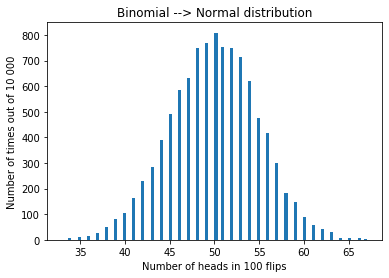

In [19]:
plt.hist(bell(),100)
plt.xlabel('Number of heads in 100 flips')
plt.ylabel('Number of times out of 10 000')
plt.title('Binomial --> Normal distribution')
plt.show()